In [3006]:
import yfinance as yf
import datetime
import plotly.express as px
import numpy as np
import pandas as pd
import ta
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sys

In [3007]:
import warnings
warnings.filterwarnings('ignore')

In [3008]:
ticker_symbol = "GOOGL"  # stocks for Google

end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365 * 4)  # 4 years (so that no NaN values in the indicator values, excatly from 3 years ago)

stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3009]:
closing_price = stock_data['Close'].reset_index()

In [3010]:
fig = px.line(closing_price, x='Date', y='Close', title='Google Stock Prices (Last 3 Years)',
              labels={'Close': 'Closing Price (USD)', 'Date': 'Date'})

fig.show()

In [3011]:
closing_price['MA_200'] = ta.trend.sma_indicator(closing_price['Close'], window=200)
closing_price['MACD'] = ta.trend.macd(closing_price['Close'], window_slow=26, window_fast=12)

closing_price['Bollinger_Upper'] = ta.volatility.bollinger_hband(closing_price['Close'], window=5)
closing_price['Bollinger_Lower'] = ta.volatility.bollinger_lband(closing_price['Close'], window=5)

closing_price['KAMA'] = ta.momentum.kama(closing_price['Close'], window=20)
closing_price['ROC_Indicator'] = ta.momentum.roc(closing_price['Close'], window=20)
closing_price['RSI_Indicator'] = ta.momentum.rsi(closing_price['Close'], window=20)

closing_price['MACD_Signal'] = ta.trend.macd_signal(closing_price['Close'], window_slow=26, window_fast=12)

closing_price['StochRSI_Indicator'] = ta.momentum.stochrsi(closing_price['Close'], window=20)
closing_price['BollingerMovingAverage'] = ta.volatility.bollinger_mavg(closing_price['Close'], window=5)
closing_price['EMA_Indicator'] = ta.trend.ema_indicator(closing_price['Close'], window=20)

closing_price['TSI'] = ta.momentum.tsi(closing_price['Close'], window_slow=26, window_fast=12)

In [3012]:
closing_price

Date       Close     MA_200      MACD  Bollinger_Upper  \
0    2020-01-27   71.586502        NaN       NaN              NaN   
1    2020-01-28   72.525002        NaN       NaN              NaN   
2    2020-01-29   72.834999        NaN       NaN              NaN   
3    2020-01-30   72.712502        NaN       NaN              NaN   
4    2020-01-31   71.639000        NaN       NaN        73.334718   
...         ...         ...        ...       ...              ...   
1001 2024-01-18  143.479996  127.17010  1.894708       143.760199   
1002 2024-01-19  146.380005  127.38020  2.186269       146.634197   
1003 2024-01-22  145.990005  127.58655  2.358675       147.816217   
1004 2024-01-23  147.039993  127.79940  2.550630       149.041938   
1005 2024-01-24  149.029999  128.00245  2.830702       149.963958   

      Bollinger_Lower        KAMA  ROC_Indicator  RSI_Indicator  MACD_Signal  \
0                 NaN         NaN            NaN            NaN          NaN   
1                 NaN         NaN            NaN            NaN          NaN   
2                 NaN         NaN            NaN            NaN          NaN   
3                 NaN         NaN            NaN            NaN          NaN   
4           71.184483         NaN            NaN            NaN          NaN   
...               ...         ...            ...            ...          ...   
1001       141.107800  138.523229       5.655370      60.839191     1.659297   
1002       139.953803  139.200717       7.120389      64.787537     1.764692   
1003       140.107788  139.639827       5.529861      63.875859     1.883488   
1004       140.702062  140.052129       4.714425      65.261214     2.016917   
1005       142.804042  140.624248       5.328994      67.730135     2.179674   

      StochRSI_Indicator  BollingerMovingAverage  EMA_Indicator        TSI  
0                    NaN                     NaN            NaN        NaN  
1                    NaN                     NaN            NaN        NaN  
2                    NaN                     NaN            NaN        NaN  
3                    NaN                     NaN            NaN        NaN  
4                    NaN               72.259601            NaN        NaN  
...                  ...                     ...            ...        ...  
1001            0.948659              142.434000     139.791804  19.895617  
1002            1.000000              143.294000     140.419252  22.836281  
1003            0.939147              143.962003     140.949800  24.736551  
1004            1.000000              144.872000     141.529818  26.905032  
1005            1.000000              146.384000     142.244121  29.835502  

[1006 rows x 14 columns]

In [3013]:
closing_price = closing_price.loc['2021-01-24':, :].reset_index(drop=True)

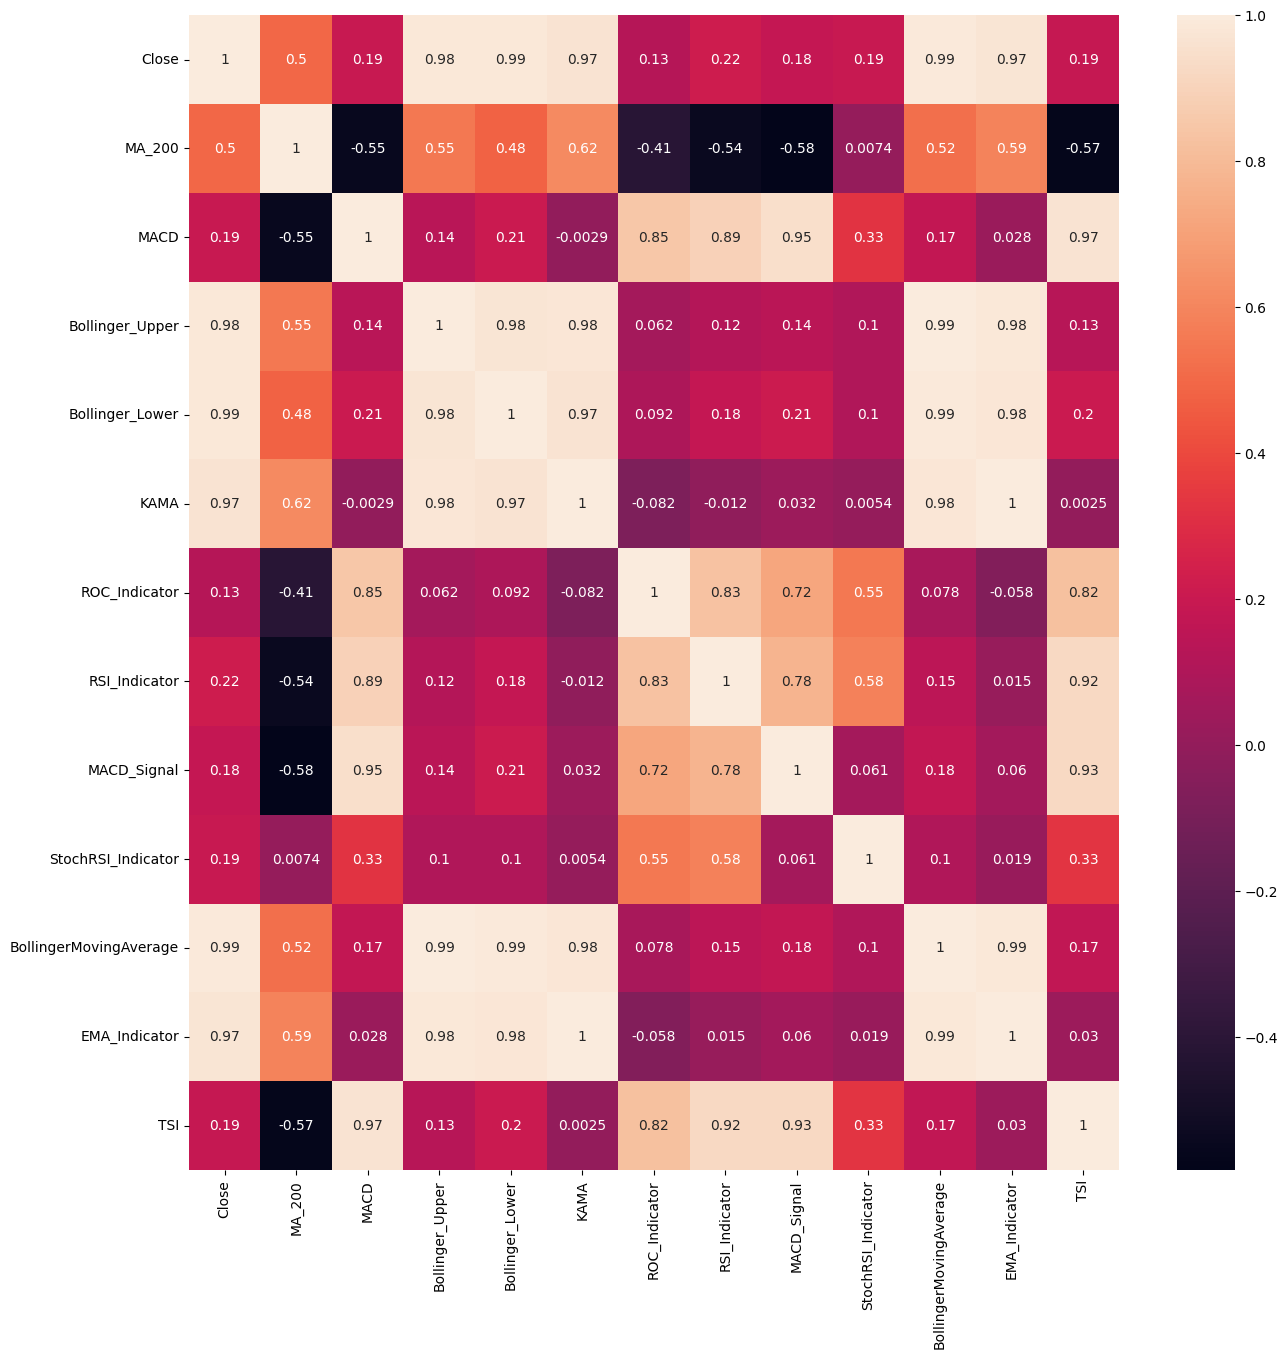

In [3014]:
plt.figure(figsize=(15, 15))
sns.heatmap(closing_price.corr(), annot=True)
plt.show()

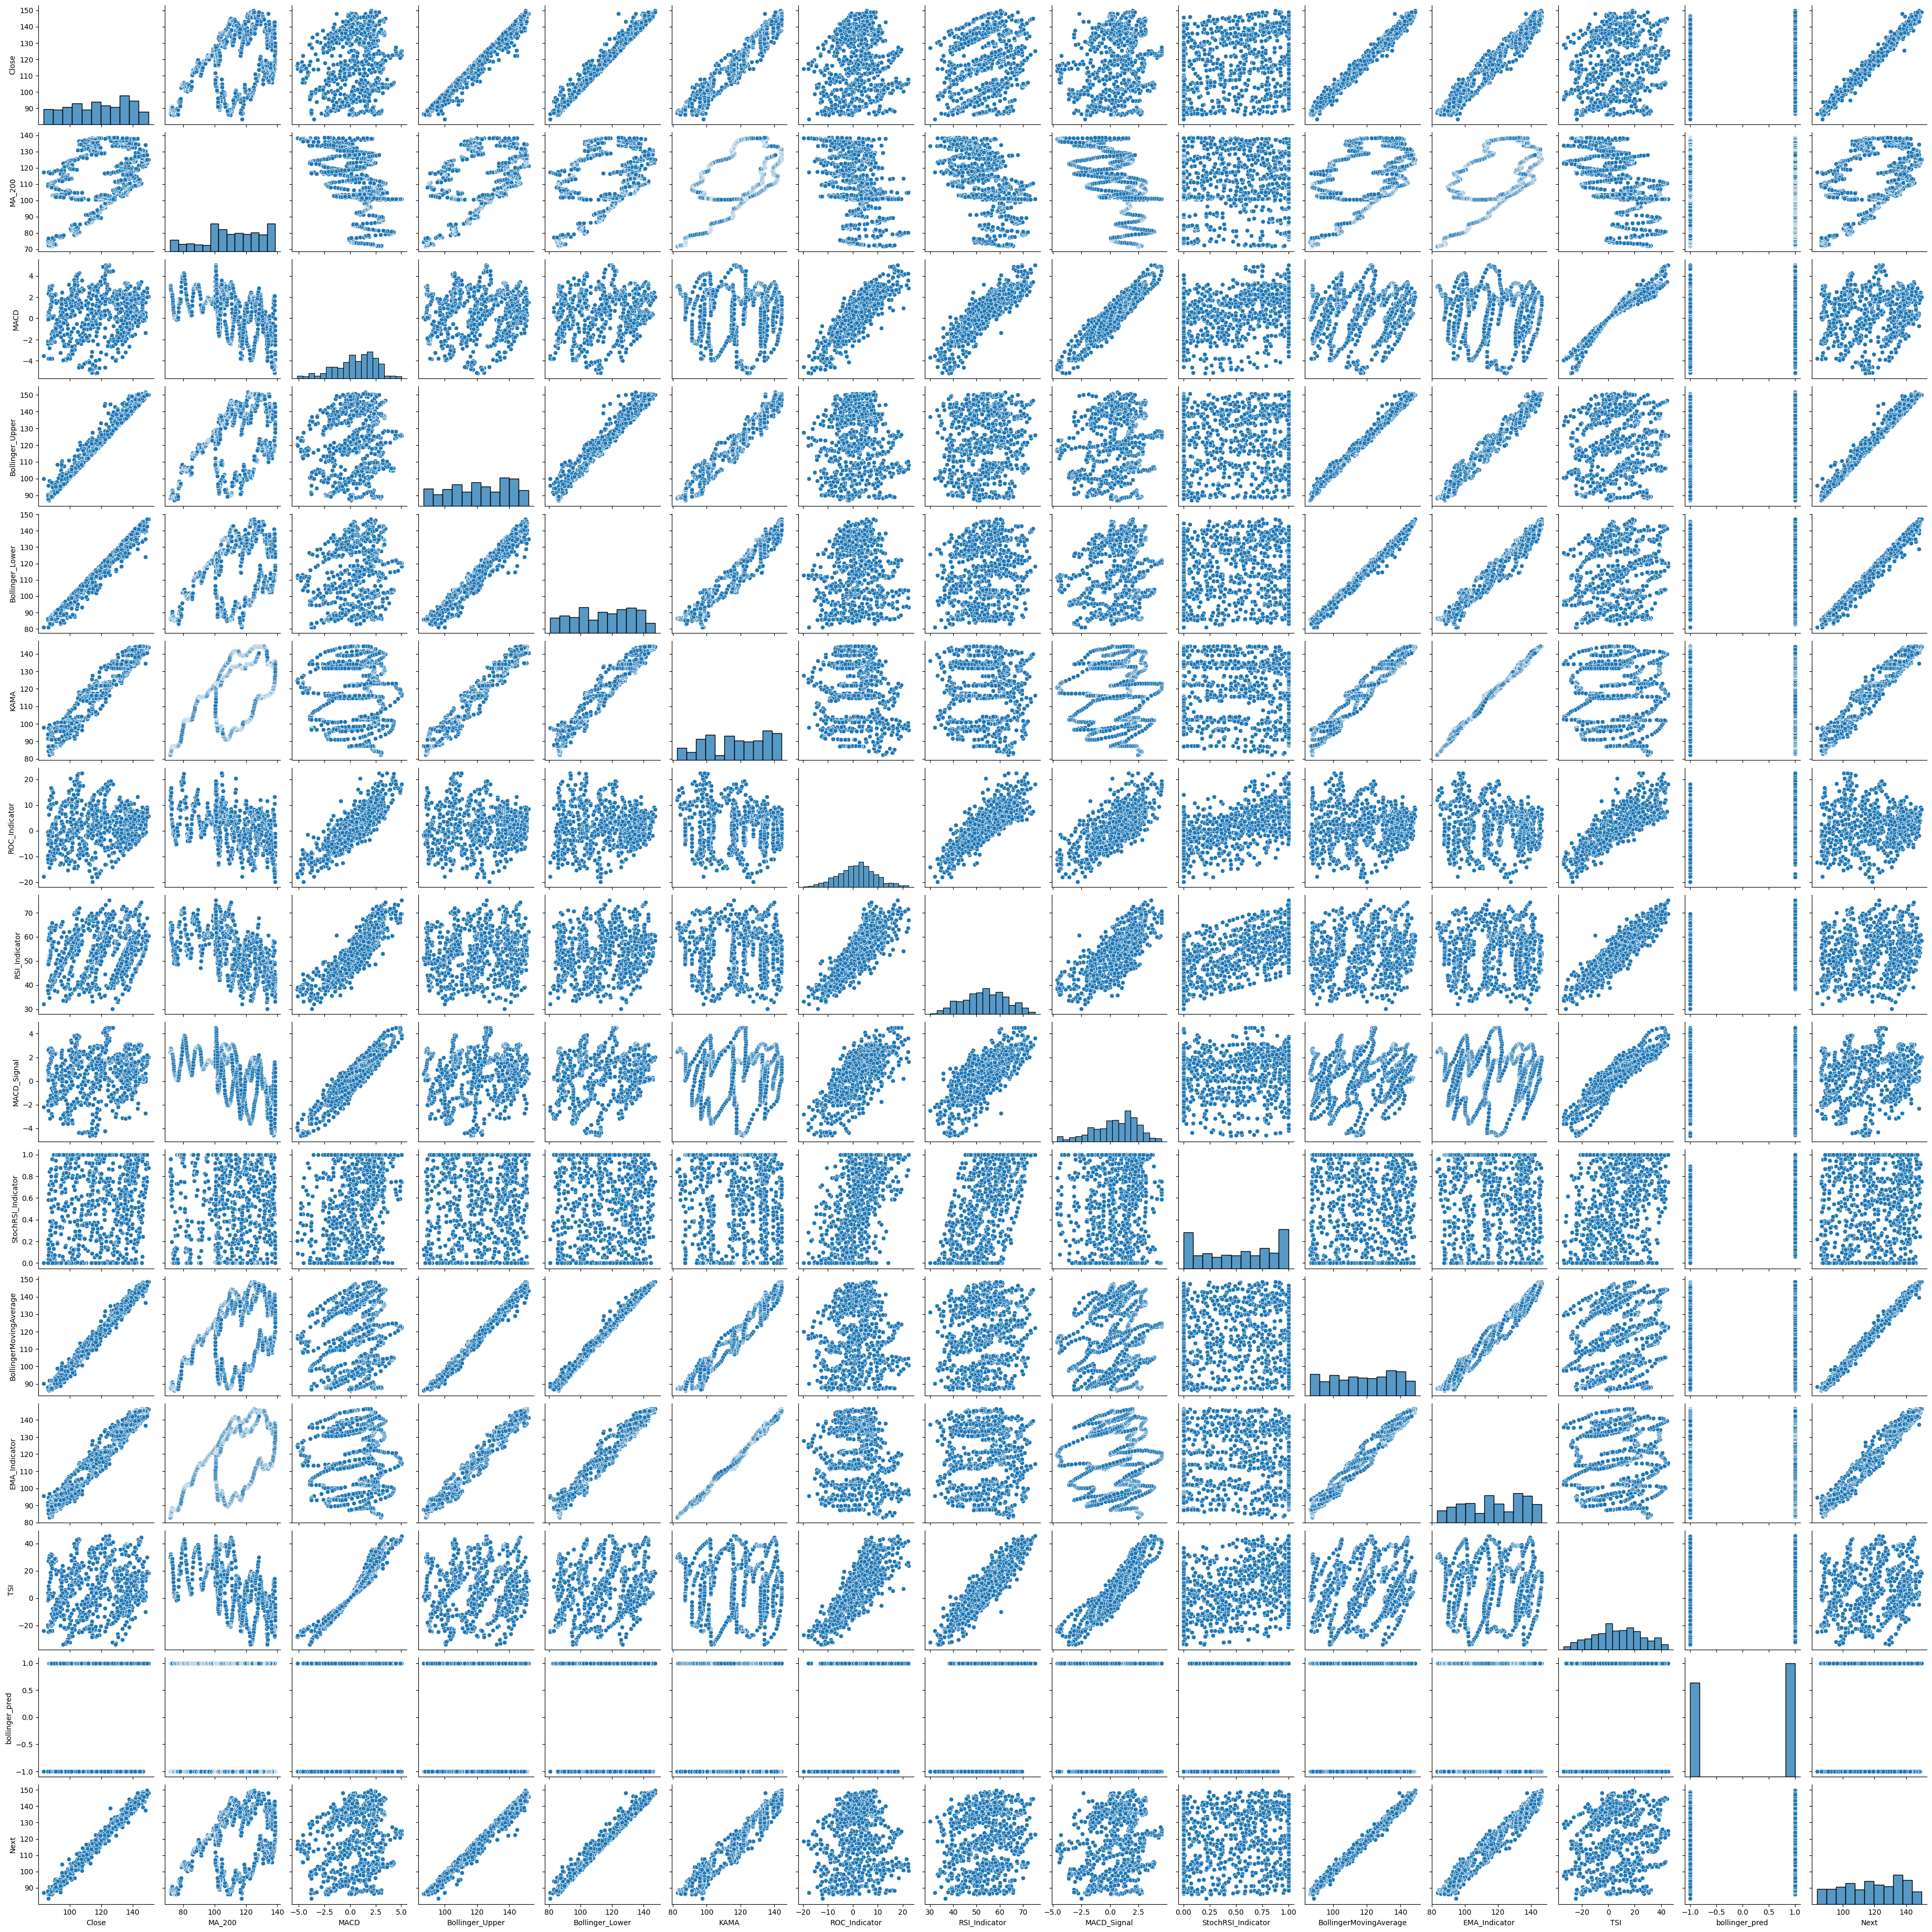

In [3030]:
sns.pairplot(closing_price)
plt.show()

In [3015]:
def find_correlated_pairs(data, correlation_threshold):
    correlation_matrix = data.corr()

    correlated_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
                correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

    return correlated_pairs

In [3016]:
correlated_pairs = find_correlated_pairs(closing_price, 0.9)

In [3017]:
correlated_pairs

[('Close', 'Bollinger_Upper'),
 ('Close', 'Bollinger_Lower'),
 ('Close', 'KAMA'),
 ('Close', 'BollingerMovingAverage'),
 ('Close', 'EMA_Indicator'),
 ('MACD', 'MACD_Signal'),
 ('MACD', 'TSI'),
 ('Bollinger_Upper', 'Bollinger_Lower'),
 ('Bollinger_Upper', 'KAMA'),
 ('Bollinger_Upper', 'BollingerMovingAverage'),
 ('Bollinger_Upper', 'EMA_Indicator'),
 ('Bollinger_Lower', 'KAMA'),
 ('Bollinger_Lower', 'BollingerMovingAverage'),
 ('Bollinger_Lower', 'EMA_Indicator'),
 ('KAMA', 'BollingerMovingAverage'),
 ('KAMA', 'EMA_Indicator'),
 ('RSI_Indicator', 'TSI'),
 ('MACD_Signal', 'TSI'),
 ('BollingerMovingAverage', 'EMA_Indicator')]

In [3018]:
closing_price.corr()['Close'].sort_values(ascending=False)

Close                     1.000000
BollingerMovingAverage    0.991182
Bollinger_Lower           0.985041
Bollinger_Upper           0.984953
EMA_Indicator             0.974316
KAMA                      0.965825
MA_200                    0.498120
RSI_Indicator             0.217511
MACD                      0.194353
StochRSI_Indicator        0.192093
TSI                       0.189907
MACD_Signal               0.179260
ROC_Indicator             0.125845
Name: Close, dtype: float64

In [3019]:
closing_price.corr()['Close'].sort_values(ascending=False)

Close                     1.000000
BollingerMovingAverage    0.991182
Bollinger_Lower           0.985041
Bollinger_Upper           0.984953
EMA_Indicator             0.974316
KAMA                      0.965825
MA_200                    0.498120
RSI_Indicator             0.217511
MACD                      0.194353
StochRSI_Indicator        0.192093
TSI                       0.189907
MACD_Signal               0.179260
ROC_Indicator             0.125845
Name: Close, dtype: float64

In [3020]:
def get_bollinger_indication(row):
  close_price = row['Close']
  bollinger_upper = row['Bollinger_Upper']
  bollinger_lower = row['Bollinger_Lower']
  bollinger_middle = row['BollingerMovingAverage']

  if close_price > bollinger_upper or (close_price < bollinger_middle and close_price > bollinger_lower):
    return -1  # Bearish
  else:
    return 1

In [3021]:
closing_price['bollinger_pred'] = closing_price.apply(get_bollinger_indication, axis=1)

In [3022]:
closing_price['Next'] = closing_price.Close.shift(1)
closing_price

Date       Close      MA_200      MACD  Bollinger_Upper  \
0   2020-11-12   87.140999   71.807125  2.982717        88.421811   
1   2020-11-13   88.612999   71.891995  3.052584        88.887076   
2   2020-11-16   88.701500   71.964853  3.079596        89.268470   
3   2020-11-17   88.083000   72.043915  3.016325        89.250691   
4   2020-11-18   87.031998   72.117563  2.848540        89.331922   
..         ...         ...         ...       ...              ...   
798 2024-01-18  143.479996  127.170100  1.894708       143.760199   
799 2024-01-19  146.380005  127.380200  2.186269       146.634197   
800 2024-01-22  145.990005  127.586550  2.358675       147.816217   
801 2024-01-23  147.039993  127.799400  2.550630       149.041938   
802 2024-01-24  149.029999  128.002450  2.830702       149.963958   

     Bollinger_Lower        KAMA  ROC_Indicator  RSI_Indicator  MACD_Signal  \
0          86.556592   82.375171      12.044592      63.576794     2.445680   
1          86.341924   82.812182      13.048410      65.634139     2.567061   
2          86.212731   83.408441      15.953466      65.756550     2.669568   
3          86.709309   83.792761      13.576346      64.077479     2.738919   
4          86.496277   83.966784       9.751005      61.278629     2.760843   
..               ...         ...            ...            ...          ...   
798       141.107800  138.523229       5.655370      60.839191     1.659297   
799       139.953803  139.200717       7.120389      64.787537     1.764692   
800       140.107788  139.639827       5.529861      63.875859     1.883488   
801       140.702062  140.052129       4.714425      65.261214     2.016917   
802       142.804042  140.624248       5.328994      67.730135     2.179674   

     StochRSI_Indicator  BollingerMovingAverage  EMA_Indicator        TSI  \
0              0.843757               87.489201      83.032304  29.828040   
1              0.953618               87.614500      83.563799  30.966931   
2              0.960155               87.740601      84.053104  31.942984   
3              0.870493               87.980000      84.436903  32.052252   
4              0.721036               87.914099      84.684055  30.939384   
..                  ...                     ...            ...        ...   
798            0.948659              142.434000     139.791804  19.895617   
799            1.000000              143.294000     140.419252  22.836281   
800            0.939147              143.962003     140.949800  24.736551   
801            1.000000              144.872000     141.529818  26.905032   
802            1.000000              146.384000     142.244121  29.835502   

     bollinger_pred        Next  
0                -1         NaN  
1                 1   87.140999  
2                 1   88.612999  
3                 1   88.701500  
4                -1   88.083000  
..              ...         ...  
798               1  141.470001  
799               1  143.479996  
800               1  146.380005  
801               1  145.990005  
802               1  147.039993  

[803 rows x 16 columns]

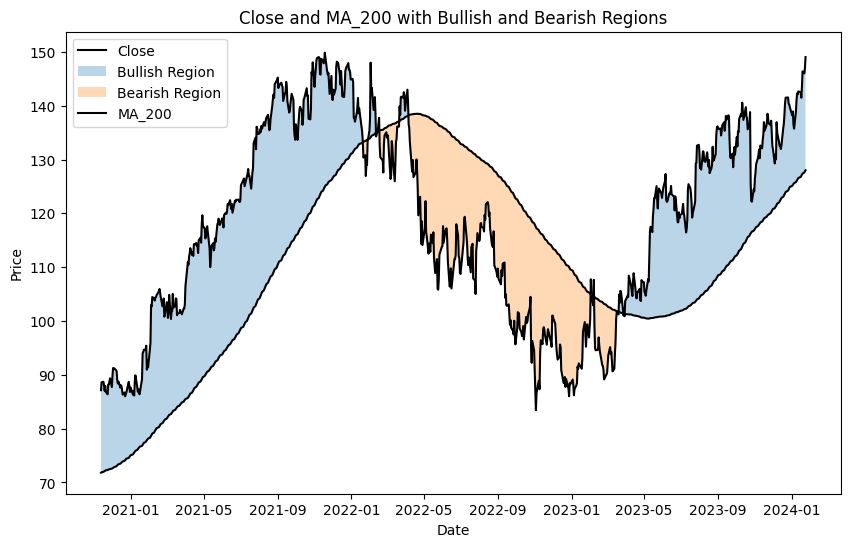

In [3023]:
closing_price['Trend'] = np.where(closing_price['Close'] > closing_price['MA_200'], 'Bullish', 'Bearish')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(closing_price['Date'], closing_price['Close'], label='Close', color='black')

ax.fill_between(closing_price['Date'], closing_price['Close'], closing_price['MA_200'], where=(closing_price['Close'] > closing_price['MA_200']),
                interpolate=True, alpha=0.3, label='Bullish Region', cmap='viridis')

ax.fill_between(closing_price['Date'], closing_price['Close'], closing_price['MA_200'], where=(closing_price['Close'] <= closing_price['MA_200']),
                interpolate=True, alpha=0.3, label='Bearish Region', cmap='viridis')
ax.plot(closing_price['Date'], closing_price['MA_200'], label='MA_200', color='black')
ax.set_title('Close and MA_200 with Bullish and Bearish Regions')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()

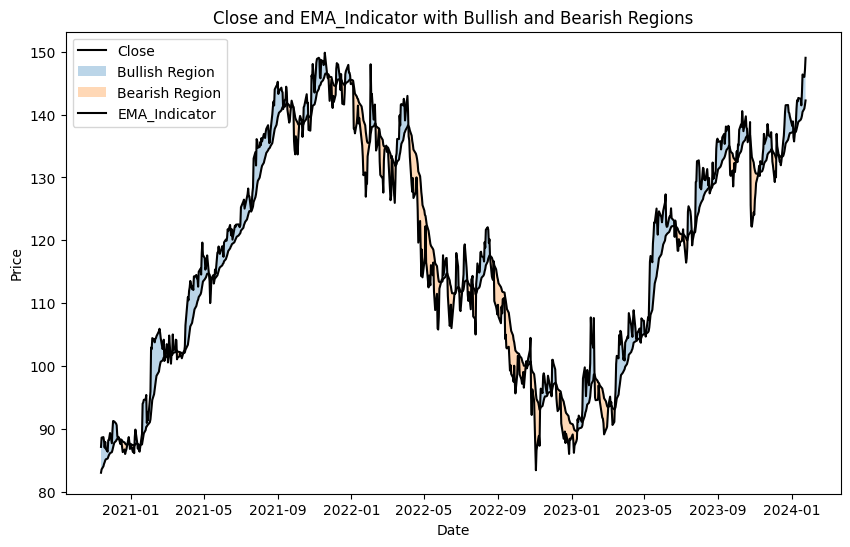

In [3024]:
closing_price['Trend'] = np.where(closing_price['Close'] > closing_price['EMA_Indicator'], 'Bullish', 'Bearish')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(closing_price['Date'], closing_price['Close'], label='Close', color='black')
ax.fill_between(closing_price['Date'], closing_price['Close'], closing_price['EMA_Indicator'], where=(closing_price['Close'] > closing_price['EMA_Indicator']),
                interpolate=True, alpha=0.3, label='Bullish Region', cmap='viridis')

ax.fill_between(closing_price['Date'], closing_price['Close'], closing_price['EMA_Indicator'], where=(closing_price['Close'] <= closing_price['EMA_Indicator']),
                interpolate=True, alpha=0.3, label='Bearish Region', cmap='viridis')
ax.plot(closing_price['Date'], closing_price['EMA_Indicator'], label='EMA_Indicator', color='black')
ax.set_title('Close and EMA_Indicator with Bullish and Bearish Regions')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()

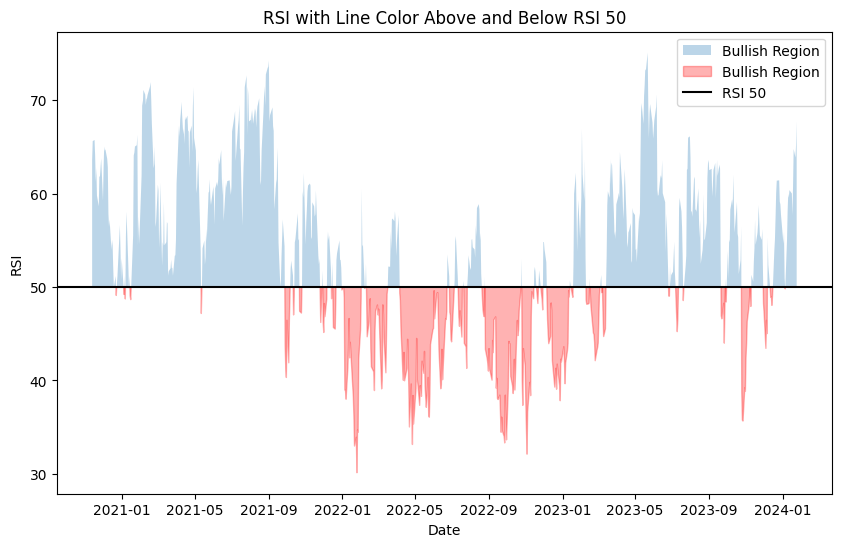

In [3025]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.fill_between(closing_price['Date'], closing_price['RSI_Indicator'], 50, where=(closing_price['RSI_Indicator'] > 50),
                interpolate=True, alpha=0.3, label='Bullish Region', cmap='viridis')

ax.fill_between(closing_price['Date'], closing_price['RSI_Indicator'], 50, where=(closing_price['RSI_Indicator'] < 50),
                interpolate=True, color='red', alpha=0.3, label='Bullish Region', cmap='viridis')
ax.axhline(y=50, color='black', label='RSI 50')
ax.set_title('RSI with Line Color Above and Below RSI 50')
ax.set_xlabel('Date')
ax.set_ylabel('RSI')
plt.legend()
plt.show()

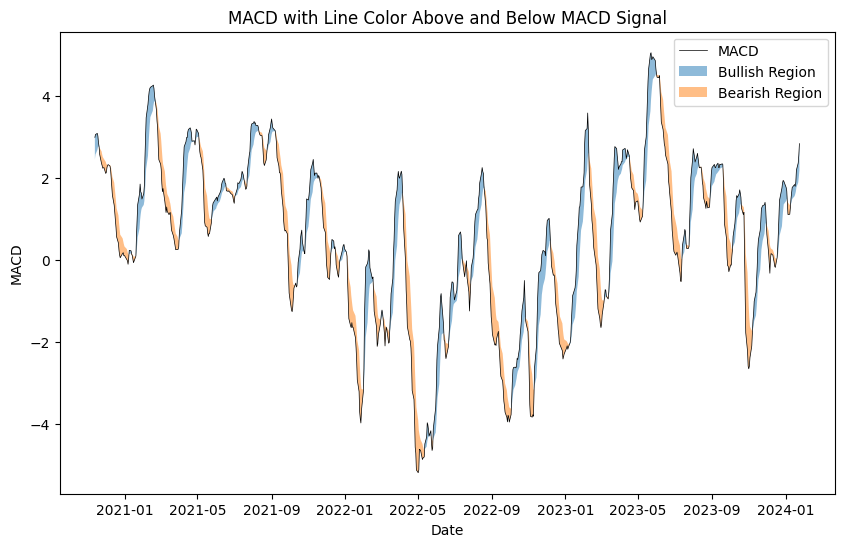

In [3027]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(closing_price['Date'], closing_price['MACD'], label='MACD', color='black', linewidth=0.5)
ax.fill_between(closing_price['Date'], closing_price['MACD'], closing_price['MACD_Signal'], where=(closing_price['MACD'] > closing_price['MACD_Signal']),
                interpolate=True, alpha=0.5, label='Bullish Region', cmap='viridis')

ax.fill_between(closing_price['Date'], closing_price['MACD'], closing_price['MACD_Signal'], where=(closing_price['MACD'] < closing_price['MACD_Signal']),
                interpolate=True, alpha=0.5, label='Bearish Region', cmap='viridis')
ax.set_title('MACD with Line Color Above and Below MACD Signal')
ax.set_xlabel('Date')
ax.set_ylabel('MACD')
plt.legend()
plt.show()

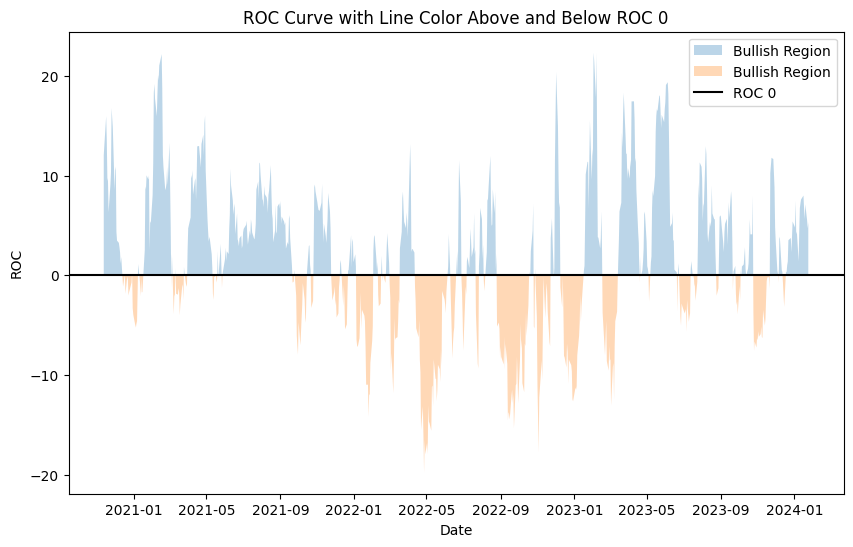

In [3028]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.fill_between(closing_price['Date'], closing_price['ROC_Indicator'], 0, where=(closing_price['ROC_Indicator'] > 0),
                interpolate=True, alpha=0.3, label='Bullish Region', cmap='viridis')

ax.fill_between(closing_price['Date'], closing_price['ROC_Indicator'], 0, where=(closing_price['ROC_Indicator'] < 0),
                interpolate=True, alpha=0.3, label='Bullish Region', cmap='viridis')

ax.axhline(y=0, color='black', label='ROC 0')
ax.set_title('ROC Curve with Line Color Above and Below ROC 0')
ax.set_xlabel('Date')
ax.set_ylabel('ROC')
plt.legend()
plt.show()

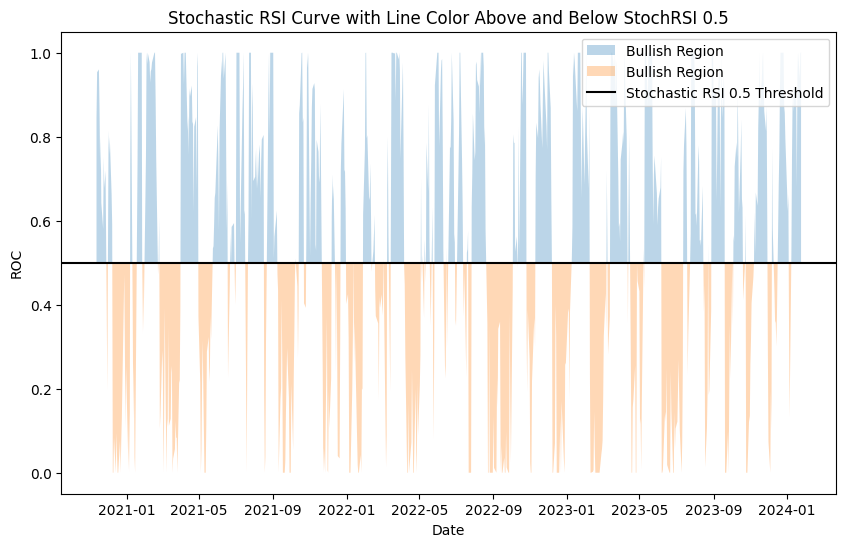

In [3029]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.fill_between(closing_price['Date'], closing_price['StochRSI_Indicator'], 0.5, where=(closing_price['StochRSI_Indicator'] > 0.5),
                interpolate=True, alpha=0.3, label='Bullish Region', cmap='viridis')

ax.fill_between(closing_price['Date'], closing_price['StochRSI_Indicator'], 0.5, where=(closing_price['StochRSI_Indicator'] < 0.5),
                interpolate=True, alpha=0.3, label='Bullish Region', cmap='viridis')

ax.axhline(y=0.5, color='black', label='Stochastic RSI 0.5 Threshold')
ax.set_title('Stochastic RSI Curve with Line Color Above and Below StochRSI 0.5')
ax.set_xlabel('Date')
ax.set_ylabel('ROC')
plt.legend()
plt.show()

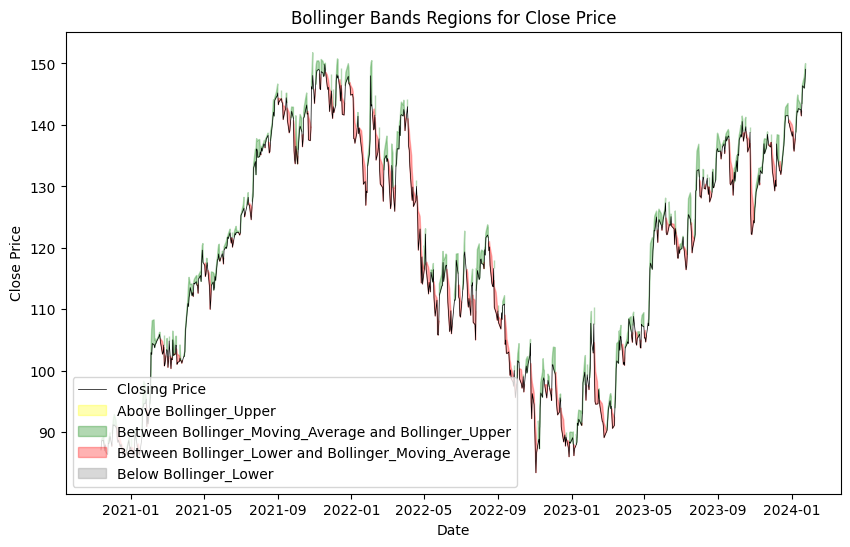

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(closing_price['Date'], closing_price['Close'], color='black', label='Closing Price', linewidth=0.5)
ax.fill_between(closing_price['Date'], closing_price['Close'], closing_price['Bollinger_Upper'],
                where=(closing_price['Close'] > closing_price['Bollinger_Upper']),
                interpolate=True, color='yellow', alpha=0.3, label='Above Bollinger_Upper')
ax.fill_between(closing_price['Date'], closing_price['Close'], closing_price['Bollinger_Upper'],
                where=(closing_price['Close'] > closing_price['BollingerMovingAverage']) &
                      (closing_price['Close'] <= closing_price['Bollinger_Upper']),
                interpolate=True, color='green', alpha=0.3, label='Between Bollinger_Moving_Average and Bollinger_Upper')
ax.fill_between(closing_price['Date'], closing_price['Close'], closing_price['BollingerMovingAverage'],
                where=(closing_price['Close'] > closing_price['Bollinger_Lower']) &
                      (closing_price['Close'] <= closing_price['BollingerMovingAverage']),
                interpolate=True, color='red', alpha=0.3, label='Between Bollinger_Lower and Bollinger_Moving_Average')
ax.fill_between(closing_price['Date'], closing_price['Close'], closing_price['BollingerMovingAverage'],
                where=(closing_price['Close'] <= closing_price['Bollinger_Lower']),
                interpolate=True, color='grey', alpha=0.3, label='Below Bollinger_Lower')
ax.set_title('Bollinger Bands Regions for Close Price')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
closing_price['Ground'] = closing_price.apply(lambda row: 1 if row['Close'] > row['Next'] else -1, axis=1)

In [ ]:
(closing_price['Ground'] == closing_price['bollinger_pred']).sum() / (closing_price.shape[0] - 1)

0.7531172069825436

In [ ]:
def get_exponential_moving_average_indication(row):
  ema_20 = row['EMA_Indicator']
  close = row['Close']
  return 1 if (close > ema_20) else -1

In [ ]:
closing_price['ema_pred'] = closing_price.apply(get_exponential_moving_average_indication, axis=1)

In [ ]:
closing_price['ma_pred'] = closing_price.apply(lambda row: 1 if row['Close'] > row['MA_200'] else -1, axis=1)

In [ ]:
(closing_price['Ground'] == closing_price['ma_pred']).sum() / (closing_price.shape[0] - 1)

0.5536159600997507

In [ ]:
(closing_price['Ground'] == closing_price['ema_pred']).sum() / (closing_price.shape[0] - 1)

0.6271820448877805

In [ ]:
closing_price['rsi_pred'] = closing_price.apply(lambda row: 1 if row['RSI_Indicator'] > 50 else -1, axis=1)

In [ ]:
(closing_price['Ground'] == closing_price['rsi_pred']).sum() / (closing_price.shape[0] - 1)

0.5985037406483791

In [ ]:
closing_price['macd_pred'] = closing_price.apply(lambda row: 1 if row['MACD'] > row['MACD_Signal'] else -1, axis=1)

In [ ]:
(closing_price['Ground'] == closing_price['macd_pred']).sum() / (closing_price.shape[0] - 1)

0.5336658354114713

In [ ]:
closing_price['roc_pred'] = closing_price.apply(lambda row: 1 if row['ROC_Indicator'] > 0 else -1, axis=1)

In [ ]:
(closing_price['Ground'] == closing_price['roc_pred']).sum() / (closing_price.shape[0] - 1)

0.5473815461346634

In [ ]:
closing_price['stochrsi_pred'] = closing_price.apply(lambda row: 1 if row['StochRSI_Indicator'] > 0.5 else -1, axis=1)

In [ ]:
(closing_price['Ground'] == closing_price['stochrsi_pred']).sum() / (closing_price.shape[0] - 1)

0.614713216957606

In [ ]:
closing_price.drop(columns=[
    'KAMA',
    'TSI',
    'EMA_Indicator',
    'StochRSI_Indicator',
    'ROC_Indicator',
], inplace=True)

In [ ]:
corrlist = closing_price[['BollingerMovingAverage', 'MA_200',
       'RSI_Indicator', 'MACD', 'Close',
       ]].corr()['Close'].sort_values(ascending=False)
corrsum = np.sum(corrlist) - corrlist['Close']
corrlist = corrlist.drop('Close')

In [ ]:
weightages = np.round(corrlist / corrlist.sum(), 2)

In [ ]:
weightages

BollingerMovingAverage    0.52
MA_200                    0.26
RSI_Indicator             0.11
MACD                      0.10
Name: Close, dtype: float64

In [ ]:
def combined_indicator(row, weightages):
  bollinger = row['bollinger_pred']
  ema = row['ema_pred']
  ma = row['ma_pred']
  rsi = row['rsi_pred']
  macd = row['macd_pred']
  stochrsi = row['stochrsi_pred']

  bullish_weight = 0
  bearish_weight = 0

  if bollinger == 1:
    bullish_weight += weightages['BollingerMovingAverage']
  else:
    bearish_weight += weightages['BollingerMovingAverage']

  if ma == 1:
    bullish_weight += weightages['MA_200']
  else:
    bearish_weight += weightages['MA_200']

  if rsi == 1:
    bullish_weight += weightages['RSI_Indicator']
  else:
    bearish_weight += weightages['RSI_Indicator']

  if macd == 1:
    bullish_weight += weightages['MACD']
  else:
    bearish_weight += weightages['MACD']


  return 1 if bullish_weight > bearish_weight else -1

In [ ]:
closing_price['combined_indicator'] = closing_price.apply(combined_indicator, axis=1, weightages=weightages)

In [ ]:
accuracy = (closing_price['Ground'] == closing_price['combined_indicator']).sum() / (closing_price.shape[0] - 1)

In [ ]:
accuracy = np.round(accuracy, 2)

In [ ]:
print(accuracy)

0.75


In [ ]:
closing_price['combined_indicator'] = closing_price['combined_indicator'].apply(lambda x: 'L' if x == 1 else 'S')

In [ ]:
output_data = closing_price[['Close', 'combined_indicator']].rename(columns={'combined_indicator': 'Prediction'})

In [ ]:
output_data = output_data.set_index(closing_price['Date']).loc['2021-01-24':, :]

In [ ]:
output_data

Close Prediction
Date                             
2021-01-25   94.713997          L
2021-01-26   95.397499          L
2021-01-27   90.946999          S
2021-01-28   92.660004          S
2021-01-29   91.367996          S
...                ...        ...
2024-01-18  143.479996          L
2024-01-19  146.380005          L
2024-01-22  145.990005          L
2024-01-23  147.039993          L
2024-01-24  149.059998          L

[755 rows x 2 columns]

In [ ]:
output_data.to_csv('Predictions.csv')